# Dynamic Routing 

### Problem statement


Dynamic routing is an order fulfilment strategy where orders are dynamically grouped to create an optimum delivery route. An optimum delivery route is one that will cost the least and ensures that the vehicle is optimally utilized.We are going to achieve this by clustering shops(customer_id)around the fulfilment centers.

# Data collection
This data was provided by phoenix analytics 

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
sns.set(font_scale=1.5)

In [2]:
Data = pd.read_csv('dataset.csv')
Data

,order_id,customer_number,transaction_date,description,total_qty,net_total,loyalty_amount,loyalty_points,discount_amount,customer_group,territory,delivery_date,delivery_window_end_time,delivery_window_start_time,set_warehouse,duka_latitude,duka_longitude
0,04aeddd4-d9b3-4cca-ab3b-072ca177a3e1,ID_172101,28/03/2022,Steam Energy Energy Drink 400ML CARTON (1.0 Item),6,2231.57,0,0,66.38,Individual,Meru,29/03/2022,19:00:00,13:00:00,Meru Main - KDKE,0.036784,37.654155
1,04aeddd4-d9b3-4cca-ab3b-072ca177a3e1,ID_172101,28/03/2022,Sumo Candles 8PC CARTON (12.0 Outers),6,2231.57,0,0,66.38,Individual,Meru,29/03/2022,19:00:00,13:00:00,Meru Main - KDKE,0.036784,37.654155
2,04aeddd4-d9b3-4cca-ab3b-072ca177a3e1,ID_172101,28/03/2022,Rhino Matches Kubwa 10 Boxes OUTER (1.0 Item),6,2231.57,0,0,66.38,Individual,Meru,29/03/2022,19:00:00,13:00:00,Meru Main - KDKE,0.036784,37.654155
3,4da580db-3b2c-4dff-a181-9c1341e05ea5,ID_172101,12/03/2022,Dawn Tissue Rolls Smart 40PC BALE (1.0 Bale),5,3637.91,0,0,38.53,Individual,Meru,14/03/2022,14:00:00,08:00:00,Meru Main - KDKE,0.036784,37.654155
4,4da580db-3b2c-4dff-a181-9c1341e05ea5,ID_172101,12/03/2022,Sawa Bath Soap 125G White DOZEN (1.0 Dzn),5,3637.91,0,0,38.53,Individual,Meru,14/03/2022,14:00:00,08:00:00,Meru Main - KDKE,0.036784,37.654155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43713,4802cfab-74e0-4813-8b1f-2931f068f65f,ID_066466,15/03/2022,Camel Maize Flour 1KG BALE (20.0 PC),2,1194.83,0,0,14.00,Individual,Karatina,16/03/2022,14:00:00,08:00:00,Karatina Main - KDKE,-0.564060,37.074678
43714,5ff62a4e-d369-4e50-b049-9a1021792241,ID_066466,21/02/2022,Local White Sugar 50KG BAG (1.0 Item),4,6874.52,0,0,80.55,Individual,Karatina,22/02/2022,14:00:00,08:00:00,Karatina Main - KDKE,-0.564060,37.074678
43715,5ff62a4e-d369-4e50-b049-9a1021792241,ID_066466,21/02/2022,Dawn Pekee Tissue Rolls Jumbo BALE (1.0 Item),4,6874.52,0,0,80.55,Individual,Karatina,22/02/2022,14:00:00,08:00:00,Karatina Main - KDKE,-0.564060,37.074678
43716,5ff62a4e-d369-4e50-b049-9a1021792241,ID_066466,21/02/2022,Dawn Pekee Tissue Rolls 40PC BALE (1.0 Item),4,6874.52,0,0,80.55,Individual,Karatina,22/02/2022,14:00:00,08:00:00,Karatina Main - KDKE,-0.564060,37.074678


In [3]:
territory_data = pd.read_csv('territories_centroids.csv')
territory_data

,id,territory,warehouse_latitude,warehouse_longitude
0,1,Athi River,-1.427556,36.970444
1,2,Eastlands,-1.324139,36.867000
2,3,Eldoret,0.520185,35.256327
3,4,Embu,-0.542030,37.454250
4,5,Juja,-1.108111,37.013861
5,6,Karatina,-0.473139,37.126222
6,7,Kawangware,-1.288750,36.751778
7,8,Kiambu,-1.228444,36.688194
8,9,Kisii,-0.671333,34.767889
9,10,Kisumu1,-0.087944,34.759667


In [4]:
territory_data = territory_data.drop('id',axis=1)
territory_data

,territory,warehouse_latitude,warehouse_longitude
0,Athi River,-1.427556,36.970444
1,Eastlands,-1.324139,36.867000
2,Eldoret,0.520185,35.256327
3,Embu,-0.542030,37.454250
4,Juja,-1.108111,37.013861
5,Karatina,-0.473139,37.126222
6,Kawangware,-1.288750,36.751778
7,Kiambu,-1.228444,36.688194
8,Kisii,-0.671333,34.767889
9,Kisumu1,-0.087944,34.759667


###### Merging the two datasets 

In [5]:
# Merge the two datasets on the 'territory' column
data = pd.merge(Data, territory_data, on='territory')


In [6]:
data.shape

(43718, 19)

In [7]:
print(data.columns)

Index(['order_id', 'customer_number', 'transaction_date', 'description',
       'total_qty', 'net_total', 'loyalty_amount', 'loyalty_points',
       'discount_amount', 'customer_group', 'territory', 'delivery_date',
       'delivery_window_end_time', 'delivery_window_start_time',
       'set_warehouse', 'duka_latitude', 'duka_longitude',
       'warehouse_latitude', 'warehouse_longitude'],
      dtype='object')


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43718 entries, 0 to 43717
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   order_id                    43718 non-null  object 
 1   customer_number             43718 non-null  object 
 2   transaction_date            43718 non-null  object 
 3   description                 43718 non-null  object 
 4   total_qty                   43718 non-null  int64  
 5   net_total                   43718 non-null  float64
 6   loyalty_amount              43718 non-null  int64  
 7   loyalty_points              43718 non-null  int64  
 8   discount_amount             43718 non-null  float64
 9   customer_group              43718 non-null  object 
 10  territory                   43718 non-null  object 
 11  delivery_date               43718 non-null  object 
 12  delivery_window_end_time    43718 non-null  object 
 13  delivery_window_start_time  437

Our data contains both categorical and numeric variables.

In [9]:
#Have a quick look at the data
for column in data.columns:
  print(column)
  print(data[column].value_counts())
  print('-'*50)

order_id
28066c6f-6d8d-4498-a61b-bd448ed0e2a1    35
c44ca233-ea1e-404c-a987-b782231aeb96    32
c9d4adce-2fd9-413b-bf5a-d769088e692c    26
48e31c5c-1967-4d83-a8d1-46d59997a0e3    23
d3cc0686-3ea0-461c-9c23-1aeafec8304e    22
                                        ..
cf2847fd-01b2-4005-8b01-20ec37fcacdf     1
9592358d-89ce-4dd0-8971-d774e41f5e12     1
8bb74022-cbbe-4ae0-b79b-56f1a406dc95     1
cc431068-dc4c-47a8-bfee-33b9a6540ba9     1
832e3353-ae82-46e4-8a79-922c7e3bbb58     1
Name: order_id, Length: 20607, dtype: int64
--------------------------------------------------
customer_number
ID_164579    159
ID_006921    142
ID_178264    128
ID_186105    125
ID_089856    118
            ... 
ID_149998      1
ID_152654      1
ID_097953      1
ID_111048      1
ID_086469      1
Name: customer_number, Length: 3397, dtype: int64
--------------------------------------------------
transaction_date
21/03/2022    1770
14/03/2022    1628
01/03/2022    1499
28/03/2022    1466
28/02/2022    1399
22/03/2

In [10]:
data.isnull().sum()

order_id                      0
customer_number               0
transaction_date              0
description                   0
total_qty                     0
net_total                     0
loyalty_amount                0
loyalty_points                0
discount_amount               0
customer_group                0
territory                     0
delivery_date                 0
delivery_window_end_time      0
delivery_window_start_time    0
set_warehouse                 0
duka_latitude                 0
duka_longitude                0
warehouse_latitude            0
warehouse_longitude           0
dtype: int64

Wow...no missing value

In [11]:
data.duplicated().sum()

10

In [12]:
#dropping the duplicated columns
data.drop_duplicates(inplace=True)

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_qty,43708.0,6.601354,13.363069,1.000000,2.000000,4.000000,7.000000,5.000000e+02
net_total,43708.0,10463.884724,30236.794804,181.030000,2556.035000,4864.660000,9483.705000,1.379599e+06
loyalty_amount,43708.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
loyalty_points,43708.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
discount_amount,43708.0,178.736098,496.701172,0.000000,35.600000,72.700000,155.212500,2.023125e+04
duka_latitude,43708.0,-1.218989,1.066393,-4.289833,-1.314316,-1.218128,-0.628575,8.851695e-01
duka_longitude,43708.0,36.898718,1.130638,34.455751,36.715435,36.905558,37.023091,4.012190e+01
warehouse_latitude,43708.0,-1.271168,1.038388,-4.051917,-1.324139,-1.228694,-0.671333,5.201846e-01
warehouse_longitude,43708.0,36.878003,1.123665,34.759667,36.725028,36.876361,37.013861,3.974653e+01


In [14]:
data.describe(include='object').T

,count,unique,top,freq
order_id,43708,20607,28066c6f-6d8d-4498-a61b-bd448ed0e2a1,35
customer_number,43708,3397,ID_164579,159
transaction_date,43708,51,21/03/2022,1770
description,43708,487,Local White Sugar 50KG BAG (1.0 Item),4213
customer_group,43708,2,Individual,43596
territory,43708,19,Kawangware,4270
delivery_date,43708,44,21/03/2022,1662
delivery_window_end_time,43708,7,19:00:00,22657
delivery_window_start_time,43708,5,13:00:00,22782
set_warehouse,43708,19,Kawangware Main - KDKE,4270


In [15]:
data.apply(lambda x: len(x.unique()))

order_id                      20607
customer_number                3397
transaction_date                 51
description                     487
total_qty                        88
net_total                     10784
loyalty_amount                    1
loyalty_points                    1
discount_amount                6446
customer_group                    2
territory                        19
delivery_date                    44
delivery_window_end_time          7
delivery_window_start_time        5
set_warehouse                    19
duka_latitude                  3343
duka_longitude                 3258
warehouse_latitude               19
warehouse_longitude              19
dtype: int64

# EXPLORATORY DATA ANALYSIS
We are going to have a deep dive into both the numerical and categorical variables in this dataset

# Model building 

In [16]:
#Extracting relevant columns as we will be focusing on the latitude and logitude only 
shop_coords = data[['customer_number', 'duka_latitude', 'duka_longitude']]
warehouse_coords = data[['set_warehouse', 'warehouse_latitude', 'warehouse_longitude']].drop_duplicates()


In [17]:
from sklearn.cluster import KMeans

# Assigning each unique warehouse to a cluster center
n_clusters = warehouse_coords.shape[0]

shop_lat_long = shop_coords[['duka_latitude', 'duka_longitude']].values

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
shop_coords['cluster'] = kmeans.fit_predict(shop_lat_long)


In [18]:
#Assigning Shops to the Nearest Fulfillment Center

cluster_centroids = kmeans.cluster_centers_

def find_nearest_warehouse(centroid, warehouses):
    distances = np.linalg.norm(warehouses[['warehouse_latitude', 'warehouse_longitude']].values - centroid, axis=1)
    return warehouses.iloc[np.argmin(distances)]['set_warehouse']

shop_coords['assigned_warehouse'] = shop_coords['cluster'].apply(
    lambda x: find_nearest_warehouse(cluster_centroids[x], warehouse_coords)
)



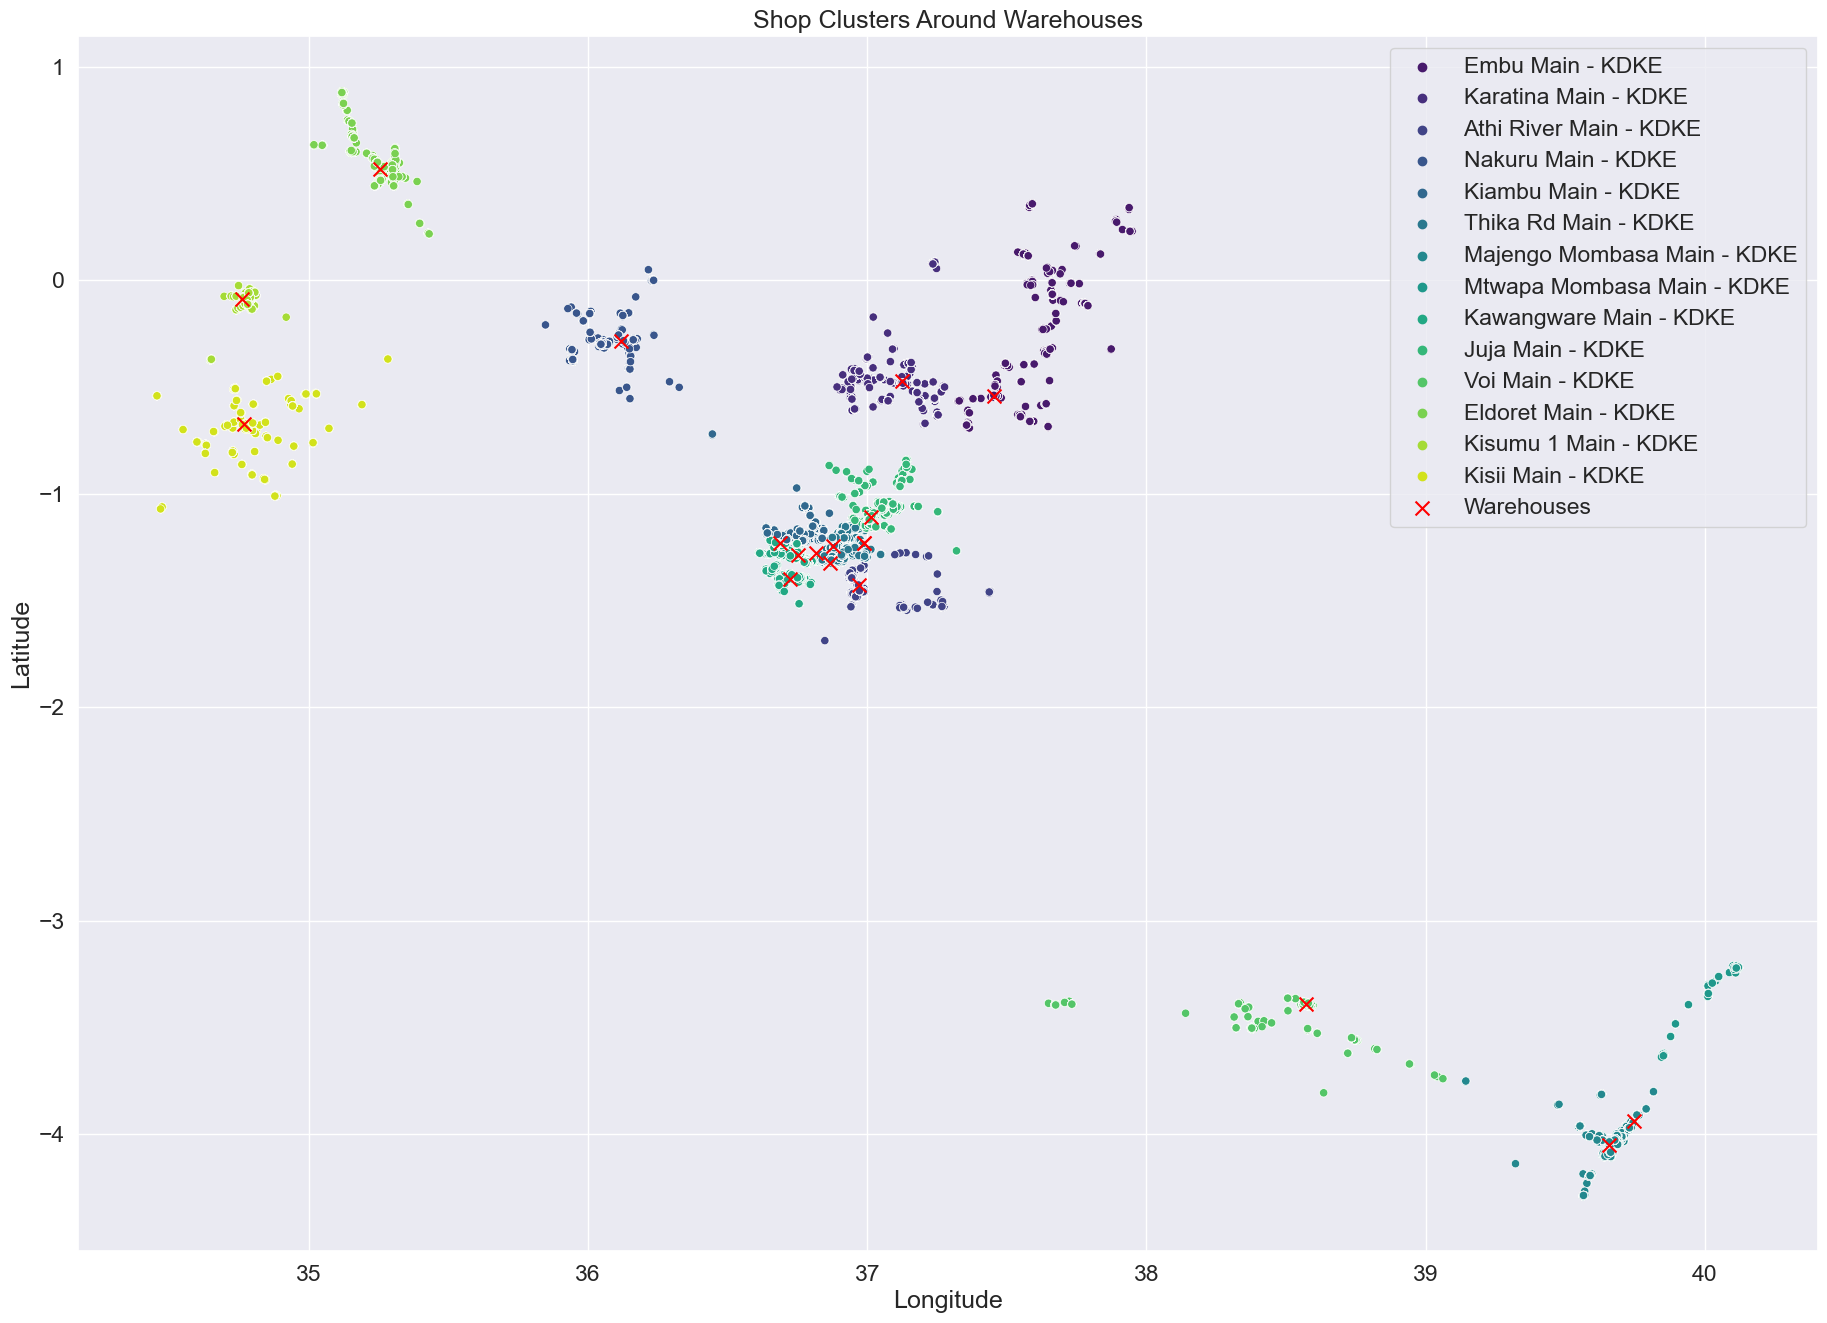

In [19]:

plt.figure(figsize=(20, 15))
sns.scatterplot(x=shop_coords['duka_longitude'], y=shop_coords['duka_latitude'], hue=shop_coords['assigned_warehouse'], palette='viridis')
plt.scatter(warehouse_coords['warehouse_longitude'], warehouse_coords['warehouse_latitude'], color='red', marker='x', s=100, label='Warehouses')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Shop Clusters Around Warehouses')
plt.legend()
plt.show()


In [20]:
final_df = shop_coords.merge(
    warehouse_coords,
    how='left',
    left_on='assigned_warehouse',
    right_on='set_warehouse'
)

final_df = final_df.rename(columns={
    'duka_latitude': 'shop_latitude',
    'duka_longitude': 'shop_longitude',
    'cluster': 'cluster_no'
})

final_df = final_df[['customer_number', 'shop_latitude', 'shop_longitude', 'warehouse_latitude', 'warehouse_longitude', 'cluster_no']]

final_df


,customer_number,shop_latitude,shop_longitude,warehouse_latitude,warehouse_longitude,cluster_no
0,ID_172101,0.036784,37.654155,-0.542030,37.454250,10
1,ID_172101,0.036784,37.654155,-0.542030,37.454250,10
2,ID_172101,0.036784,37.654155,-0.542030,37.454250,10
3,ID_172101,0.036784,37.654155,-0.542030,37.454250,10
4,ID_172101,0.036784,37.654155,-0.542030,37.454250,10
...,...,...,...,...,...,...
43703,ID_066466,-0.564060,37.074678,-0.473139,37.126222,7
43704,ID_066466,-0.564060,37.074678,-0.473139,37.126222,7
43705,ID_066466,-0.564060,37.074678,-0.473139,37.126222,7
43706,ID_066466,-0.564060,37.074678,-0.473139,37.126222,7


In [21]:
final_df.to_csv('Q1_submission_file',index=False)